In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [42]:
# CSV file with the ESRB rating data
df = pd.read_csv('../Video_games_esrb_rating.csv')


In [43]:
# Show first 5 rows
df.head()


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [44]:
# Correcting typo in the original dataframe
df = df.rename(columns={"strong_janguage": "strong_language"})


In [45]:
# Checking if there are repeated video game titles
df['title'].is_unique


True

In [46]:
# Drop title to prevent an error
col_val = df.drop(['title'], inplace=True, axis=1)


In [47]:
# Show first 5 rows
df.head()


,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


In [48]:
# Get all unique ESRB ratings
ratings = df['esrb_rating'].unique()
ratings


array(['E', 'ET', 'M', 'T'], dtype=object)

In [49]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)


In [50]:
# Make and train the decision classifier
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [51]:
# Make predictions
y_pred = classifier.predict(X_test)


In [52]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 96   2   0   1]
 [  4  49   0   8]
 [  0   0  61  12]
 [  2  18   9 117]]
              precision    recall  f1-score   support

           E       0.94      0.97      0.96        99
          ET       0.71      0.80      0.75        61
           M       0.87      0.84      0.85        73
           T       0.85      0.80      0.82       146

    accuracy                           0.85       379
   macro avg       0.84      0.85      0.85       379
weighted avg       0.85      0.85      0.85       379



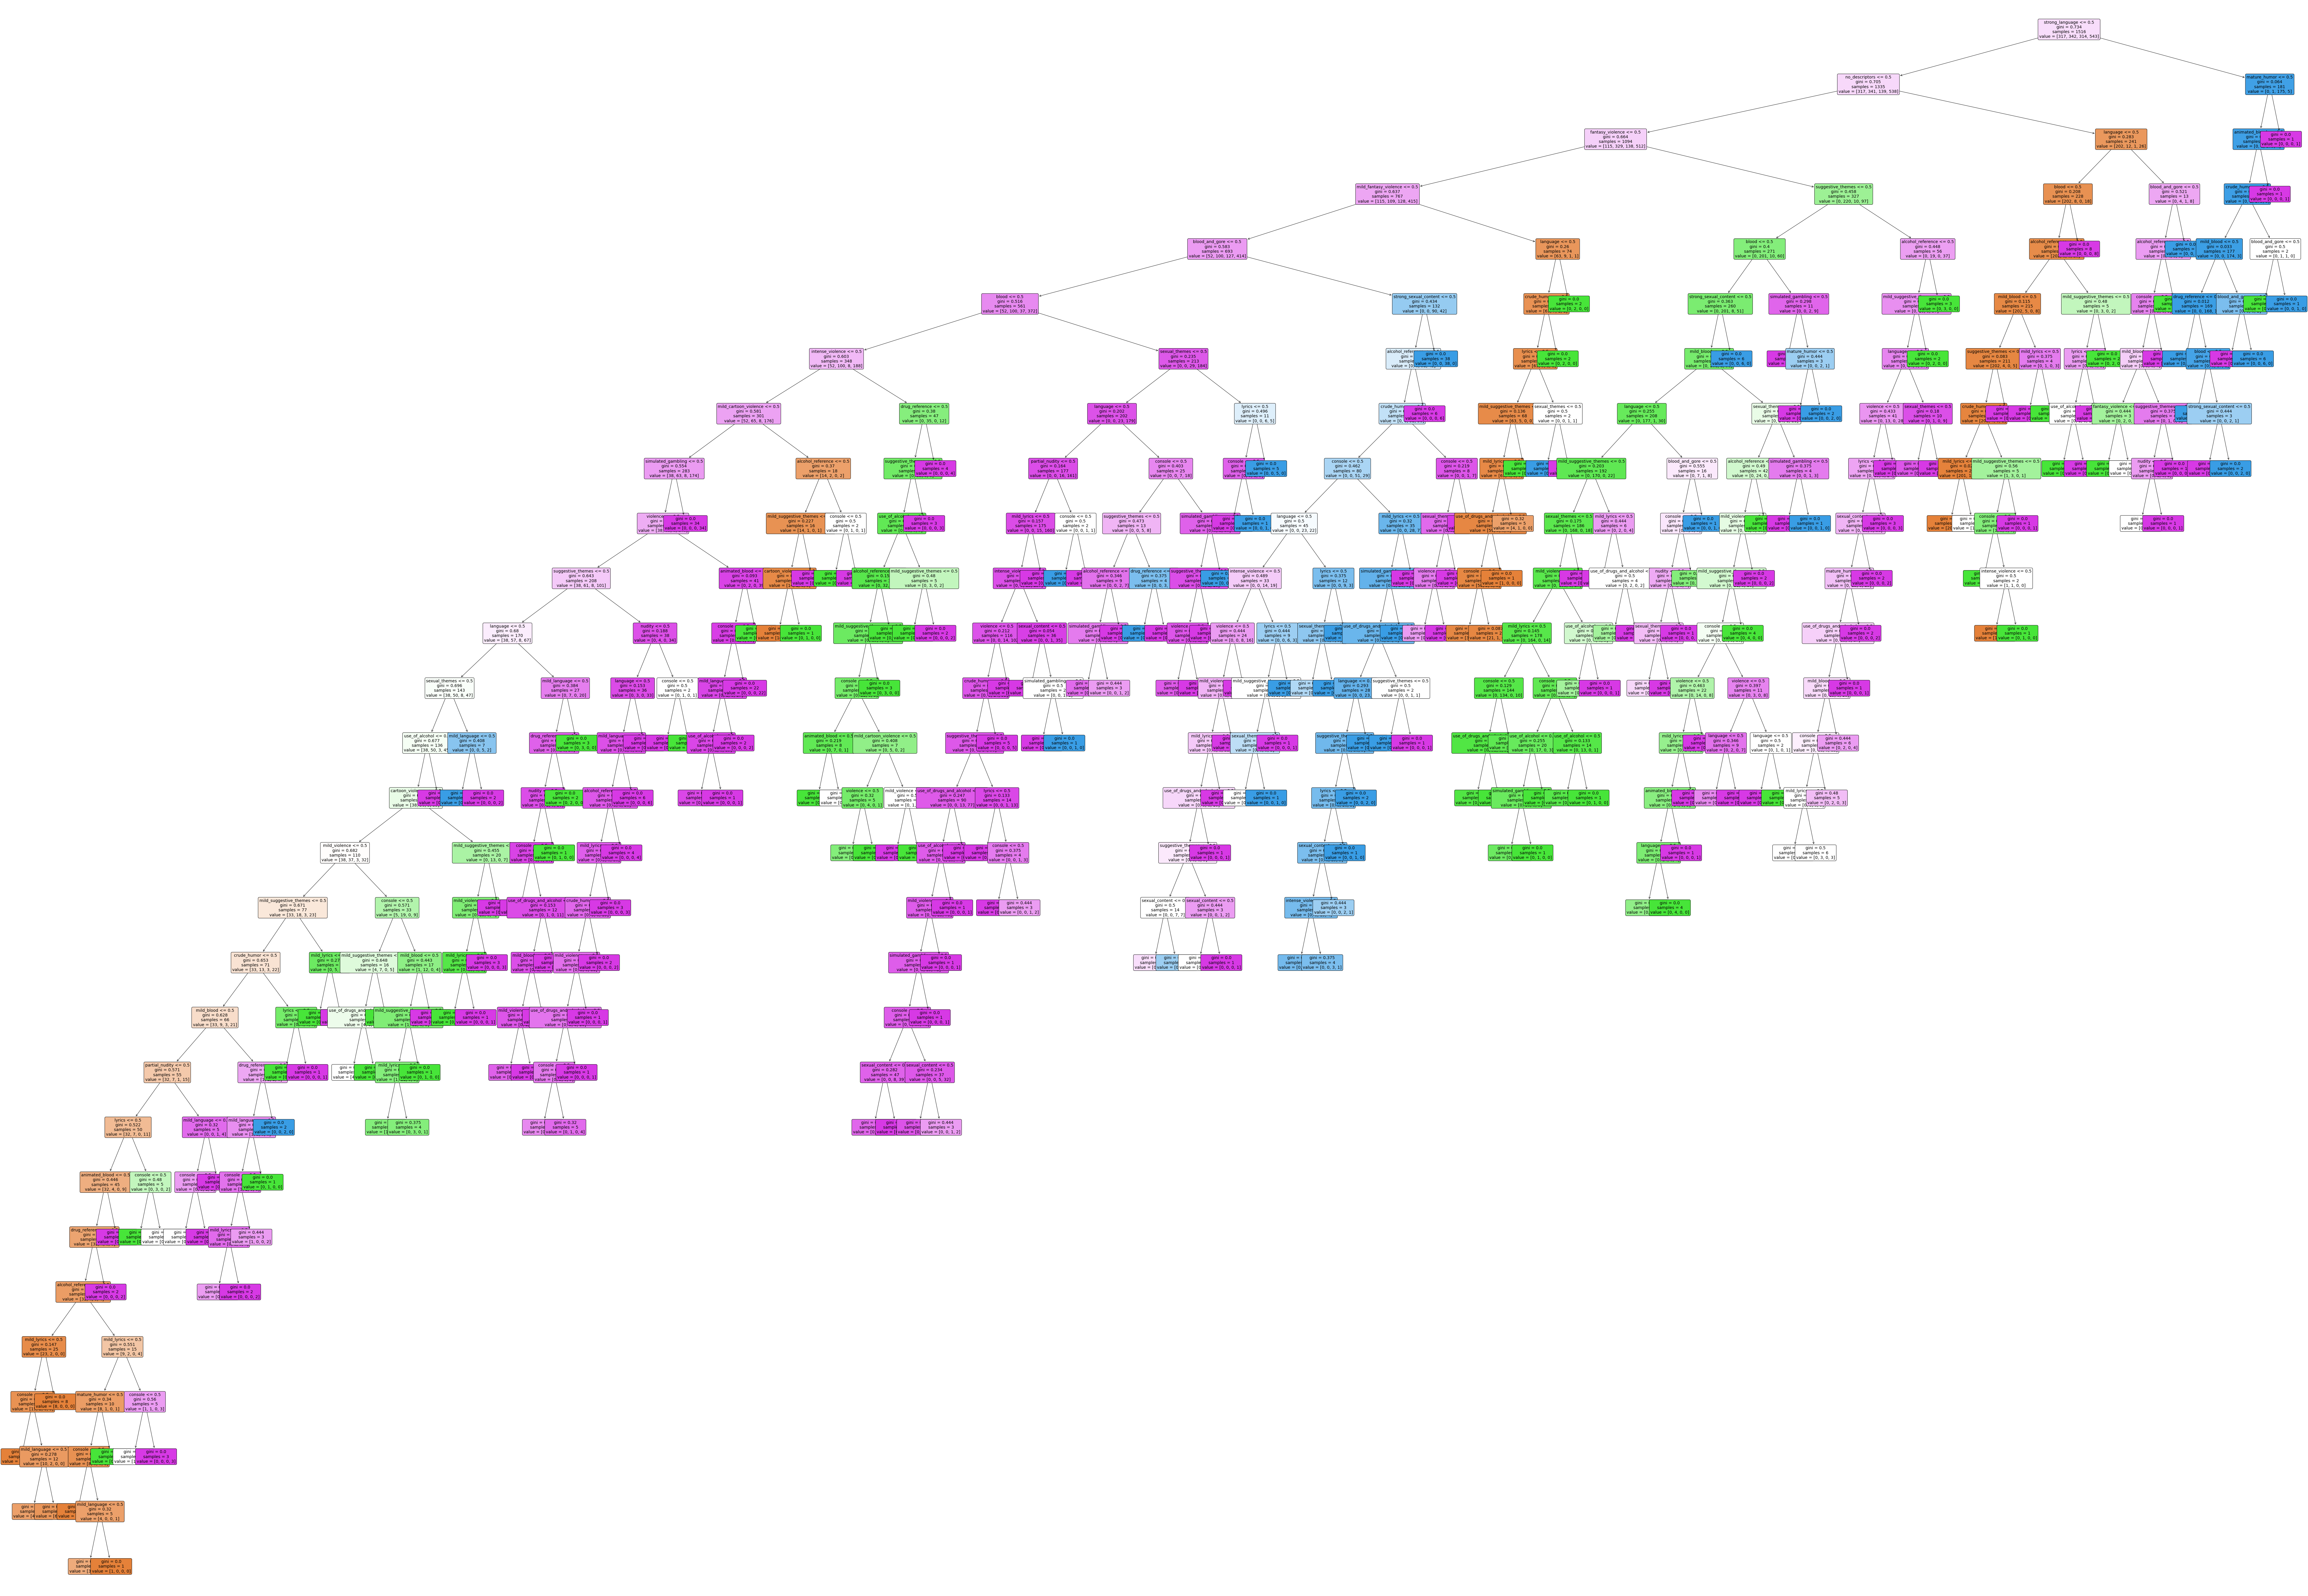

In [53]:
# Sklearn.tree built-in tree plot
plt.figure(figsize=(140, 100))  # size of figure
plot = tree.plot_tree(
    decision_tree=classifier,   # classifier
    feature_names=list(df.columns.values),
    fontsize=14,
    filled=True,
    rounded=True
)

# Save img
# plt.savefig("Decision_tree.jpeg")

plt.show()
